## Pytorch workflow

Pytorch end to end workflow

1. data (prepare and load)
2. build model
3. fitting the model to data (training)
4. making predictions and evaluating the model (inference)
5. saving and loading a model
6. putting it all together

In [21]:
import torch
from torch import nn #nn contains all of pytorch's budilding block for neural networks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## 1. Data preparing and loading
data can be alsmost anything in machine learning

1. excel sheet
2. images of anykind
3. Videos(youtube)
4. Audio like songs or podcast
5. DNA
6. Text etc...

Machine learning is a game of two parts:
1. Get data into a numerical represntation
2. Build model to learn patterns in that numerical represnetation

Let's create some know data using linear regression formula

Make a straight line with known parameters


In [4]:
# creating known parameters
weight = 0.7
bias = 0.3

#create

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) #unsqueeze adds extra dimension
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

## Splitting data into training and test sets (one of the most important concepts in machine learning)
1. Trainig set (course materials)
2. Validation set (practice exam) 
3. Test set (Final exam)

the goal is Generalization (ability of model to perform well on the unseen data)

In [10]:
## Splitting data into training and test sets (one of the most important concepts in machine learning)
train_split = int(0.8 * len(X))
X_train, y_train =  X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

How might we better visualize our data?
visualize

In [27]:
def plot_predicitons(train_data = X_train,
                     train_lables = y_train,
                     test_data = X_test,
                     test_lables = y_test,
                     predictions = None) :

 plt.figure (figsize=(10,7))

 #plot training data in blue
 plt.scatter(train_data,train_lables, c='b', s=4, label = "Training data")

 #plot test data
 plt.scatter(test_data, test_lables, c='r', s=4, label= "Test data")

 if predictions is not None:
     plt.scatter(test_data, predictions, c='y', s=4, label="Predictions")

 #Show the legend
 plt.legend(prop={"size": 14});
 

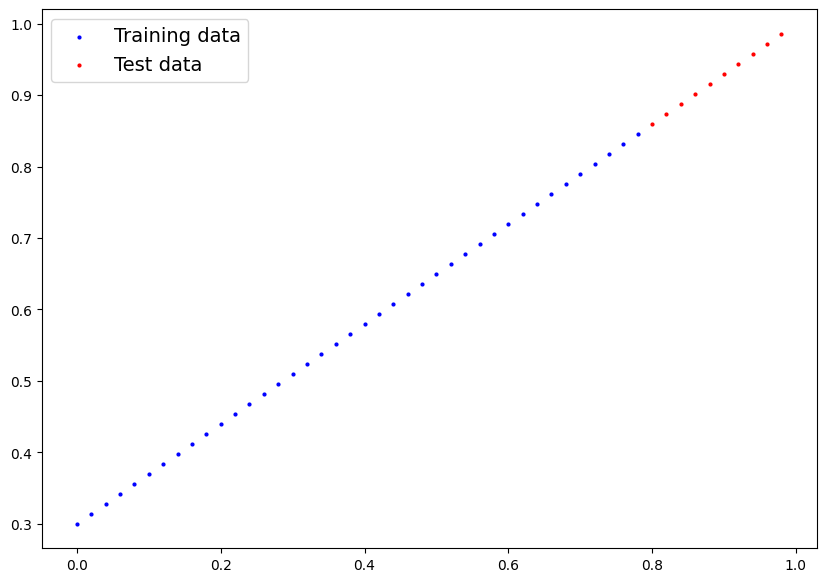

In [28]:
plot_predicitons();